In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Graphic parameters

# define colormap
cmap = plt.get_cmap('viridis')

In [57]:
no_ms = pd.read_hdf('../video-mouse-test/video0002DLC_resnet50_testFeb4shuffle1_550000.h5')
obja_ms = pd.read_hdf('../video-mouse-test/video0003DLC_resnet50_testFeb4shuffle1_550000.h5')
objb_ms = pd.read_hdf('../video-mouse-test/3CT 03122019_Cage1_0007DLC_resnet50_testFeb4shuffle1_550000.h5')
both_ms = pd.read_hdf('../video-mouse-test/video0004DLC_resnet50_testFeb4shuffle1_550000.h5')

In [58]:
# Remove header
no_ms = no_ms.DLC_resnet50_testFeb4shuffle1_550000
obja_ms = obja_ms.DLC_resnet50_testFeb4shuffle1_550000
objb_ms = objb_ms.DLC_resnet50_testFeb4shuffle1_550000
both_ms = both_ms.DLC_resnet50_testFeb4shuffle1_550000

In [8]:
# Print available body parts
np.unique(no_ms.columns.get_level_values('bodyparts'))

array(['body', 'left-ear', 'nose', 'objectA', 'objectB', 'right-ear',
       'tail', 'tail-base'], dtype=object)

In [34]:
obja_ms['objectB']

coords,x,y,likelihood
0,70.291618,212.171844,1.000000
1,70.303589,212.165237,1.000000
2,70.305313,212.169601,1.000000
3,70.292816,212.158585,1.000000
4,70.262947,212.198303,1.000000
...,...,...,...
14995,65.517860,208.228683,0.999985
14996,65.840080,207.247818,0.999964
14997,66.171280,206.730789,0.999951
14998,66.123848,206.405487,0.999961


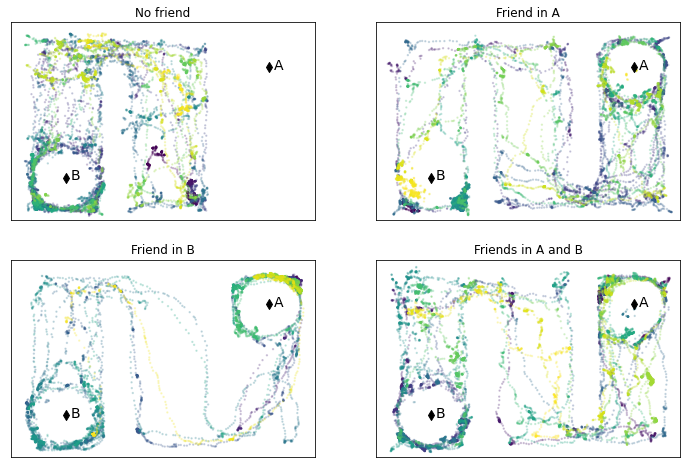

In [77]:
plt.figure(figsize=(12,8))
plt.subplot(221)

plt.scatter(no_ms['body', 'x'], 1-no_ms['body', 'y'], color=[cmap(i/no_ms.shape[0]) for i in np.arange(no_ms.shape[0])], s=2, alpha=.2)

plt.scatter(x=300, y=-87, s=50, color='k', marker='d')
plt.text(x=305, y=-90, s='A', fontdict={'size':14})

plt.scatter(x=80, y=-205, s=50, color='k', marker='d')
plt.text(x=85, y=-207, s='B', fontdict={'size':14})

plt.xlim(20,350)
plt.ylim(-250,-40)

plt.xticks([])
plt.yticks([])

plt.title('No friend')

plt.subplot(222)

plt.scatter(obja_ms['body', 'x'], 1-obja_ms['body', 'y'], color=[cmap(i/obja_ms.shape[0]) for i in np.arange(obja_ms.shape[0])], s=2, alpha=.2)

plt.scatter(x=300, y=-87, s=50, color='k', marker='d')
plt.text(x=305, y=-90, s='A', fontdict={'size':14})

plt.scatter(x=80, y=-205, s=50, color='k', marker='d')
plt.text(x=85, y=-207, s='B', fontdict={'size':14})

plt.xlim(20,350)
plt.ylim(-250,-40)
plt.xticks([])
plt.yticks([])

plt.title('Friend in A')

plt.subplot(223)

plt.scatter(objb_ms['body', 'x'], 1-objb_ms['body', 'y'], color=[cmap(i/objb_ms.shape[0]) for i in np.arange(objb_ms.shape[0])], s=2, alpha=.2)

plt.scatter(x=300, y=-87, s=50, color='k', marker='d')
plt.text(x=305, y=-90, s='A', fontdict={'size':14})

plt.scatter(x=80, y=-205, s=50, color='k', marker='d')
plt.text(x=85, y=-207, s='B', fontdict={'size':14})

plt.xlim(20,350)
plt.ylim(-250,-40)

plt.xticks([])
plt.yticks([])

plt.title('Friend in B')

plt.subplot(224)

plt.scatter(both_ms['body', 'x'], 1-both_ms['body', 'y'], color=[cmap(i/both_ms.shape[0]) for i in np.arange(both_ms.shape[0])], s=2, alpha=.2)

plt.scatter(x=300, y=-87, s=50, color='k', marker='d')
plt.text(x=305, y=-90, s='A', fontdict={'size':14})

plt.scatter(x=80, y=-205, s=50, color='k', marker='d')
plt.text(x=85, y=-207, s='B', fontdict={'size':14})

plt.xlim(20,350)
plt.ylim(-250,-40)

plt.xticks([])
plt.yticks([])

plt.title('Friends in A and B')

plt.savefig('../output/tracks.png', dpi=300)
plt.show()

In [59]:
def distance_object_body(dataset):
    
    dlc = dataset.copy()
    
    dlc['distance', 'body-a'] = np.sqrt((dlc["objectA", "x"] - dlc["body", "x"])**2 +(dlc["objectA", "y"] - dlc["body", "y"])**2)
    dlc['distance', 'body-b'] = np.sqrt((dlc["objectB", "x"] - dlc["body", "x"])**2 +(dlc["objectB", "y"] - dlc["body", "y"])**2)

    return dlc

In [62]:
no_ms = distance_object_body(no_ms)
obja_ms = distance_object_body(obja_ms)
objb_ms = distance_object_body(objb_ms)
both_ms = distance_object_body(both_ms)

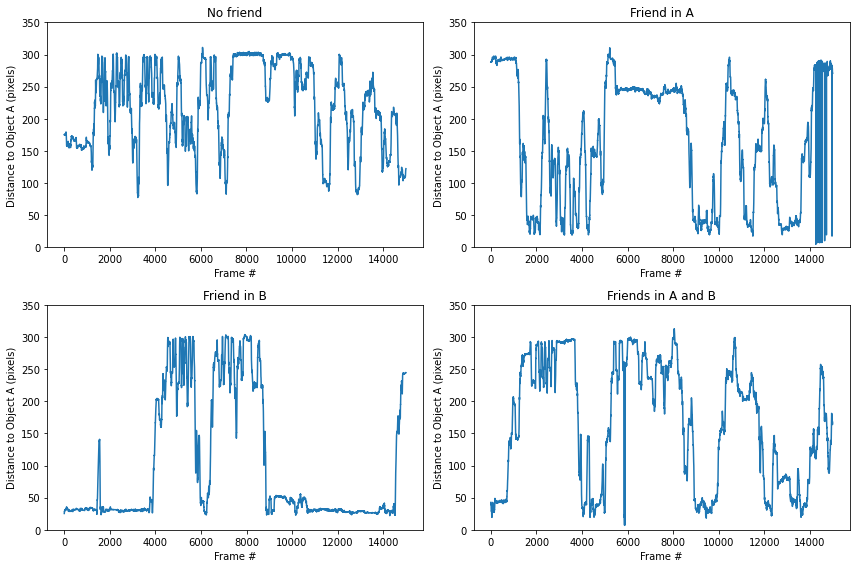

In [74]:
plt.figure(figsize=(12,8))

plt.subplot(221)

plt.plot(np.arange(no_ms.shape[0]), no_ms['distance', 'body-a'], label='No friend')

plt.ylabel('Distance to Object A (pixels)')
plt.xlabel('Frame #')

plt.ylim(0,350)

plt.title('No friend')

plt.subplot(222)

plt.plot(np.arange(obja_ms.shape[0]), obja_ms['distance', 'body-a'], label='Friend in A')
plt.ylabel('Distance to Object A (pixels)')
plt.xlabel('Frame #')

plt.ylim(0,350)

plt.title('Friend in A')

plt.subplot(223)

plt.plot(np.arange(objb_ms.shape[0]), objb_ms['distance', 'body-a'], label='Friend in B')
plt.ylabel('Distance to Object A (pixels)')
plt.xlabel('Frame #')

plt.ylim(0,350)

plt.title('Friend in B')

plt.subplot(224)

plt.plot(np.arange(both_ms.shape[0]), both_ms['distance', 'body-a'], label='Friends in A and B')
plt.ylabel('Distance to Object A (pixels)')
plt.xlabel('Frame #')

plt.ylim(0,350)

plt.title('Friends in A and B')

plt.tight_layout()
plt.savefig('../output/distance.png', dpi=300)
plt.show()

In [86]:
# We define a visit as a distance of less than 50 pixels to object A
# As the videos are at 25fps, we will calculate the number of frame that corresponds to the criterion and devide by 25 to get a number in second

no_ms_visit = sum(no_ms['distance', 'body-a'] <= 50)/25
obja_visit = sum(obja_ms['distance', 'body-a'] <= 50)/25
objb_visit = sum(objb_ms['distance', 'body-a'] <= 50)/25
both_visit = sum(both_ms['distance', 'body-a'] <=50)/25

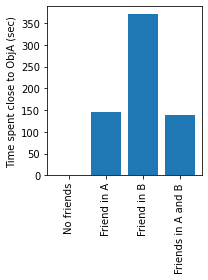

In [93]:
plt.figure(figsize=(3,4))
plt.bar(x=[0,1,2,3], height=[no_ms_visit, obja_visit, objb_visit, both_visit])
plt.ylabel('Time spent close to ObjA (sec)')
plt.xticks([0,1,2,3], ['No friends', 'Friend in A', 'Friend in B', 'Friends in A and B'], rotation='vertical')

plt.tight_layout()
plt.savefig('../output/visits.png', dpi=300)
plt.show()